<a href="https://colab.research.google.com/github/he4tnix/multimedia_tasks/blob/main/Actividad_5/Actividad_5_ContrerasPatricio_207676861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


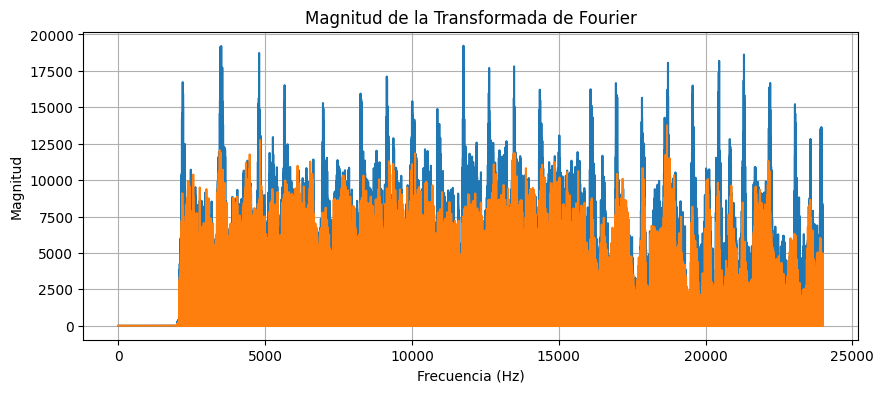

In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Se carga el audio
sample_rate, data = wavfile.read('audio.wav')

num_samples = len(data)


fft_data = np.fft.fft(data)

frequencies = np.fft.fftfreq(num_samples, 1/sample_rate)

plt.figure(figsize=(10, 4))
plt.plot(frequencies[:num_samples//2], np.abs(fft_data[:num_samples//2]))
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


## 2. Obtén el espectrograma de tu señal de audio

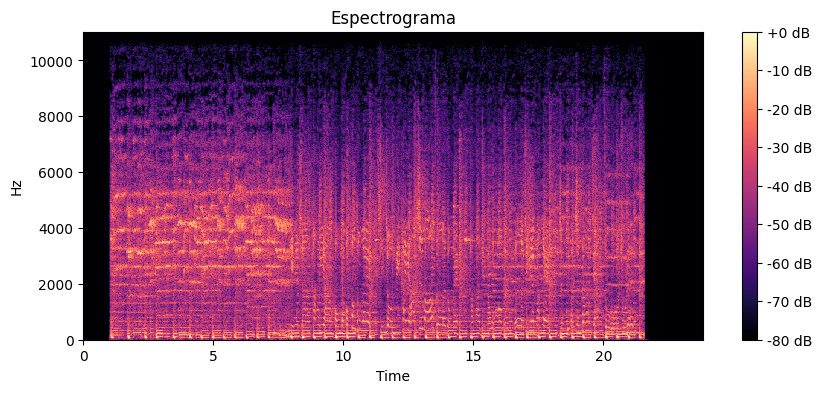

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Se carga el audio
audio_file = 'audio.wav'
y, sr = librosa.load(audio_file)

# Se calcula el espectrograma con la SFT
D = librosa.stft(y)
S = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convertir magnitudes a decibelios

# Graficar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()


## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

![image.png](attachment:image.png)

In [ ]:

def slice_audio(audio_path, slice_length, overlap):
    # Se carga el audio
    y, sr = librosa.load(audio_path, sr=None)

    # Se calcula el número total de muestras de overlap
    overlap_samples = int(slice_length * overlap)

    # Se calcula el número de muestras por slice
    slice_samples = int(slice_length * sr)

    # Lista para almacenar los slices
    slices = []

    # Índice inicial
    start_idx = 0

    # Iterar sobre el audio y generar los slices con overlap
    while start_idx + slice_samples < len(y):
        slices.append(y[start_idx:start_idx + slice_samples])
        start_idx += slice_samples - overlap_samples

    # Añadir el último slice
    slices.append(y[start_idx:])

    # Retorna los slices
    return slices

#Parámetros a utilizar
audio_path = "audio.wav"
slice_length = 3.0  # Longitud temporal de cada slice en segundos
overlap = 0.5  # Porcentaje de overlap entre slices

# Obtener los slices de audio
slices = slice_audio(audio_path, slice_length, overlap)

# Mostrar el número de slices obtenidos
print(f"Número de slices: {len(slices)}")

Número de slices: 8


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


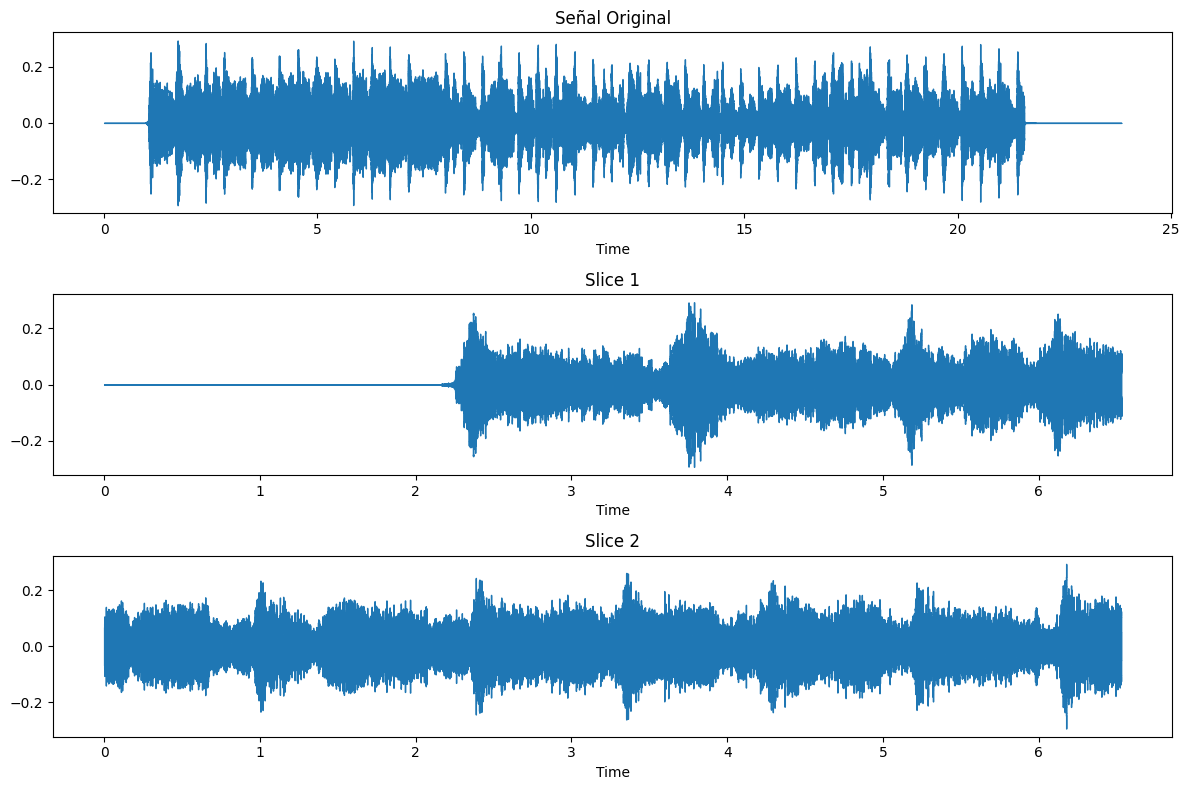

In [ ]:
import torch

# Función para convertir los slices en tensores de PyTorch
def slices_to_tensors(slices):
    tensors = [torch.tensor(slice) for slice in slices]
    return tensors

# Se convierten los slices en tensores de PyTorch
audio_tensors = slices_to_tensors(slices)


# Graficar la señal original y los primeros dos slices
plt.figure(figsize=(12, 8))

# Graficar la señal original
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Señal Original')

# Graficar el primer slice
plt.subplot(3, 1, 2)
librosa.display.waveshow(audio_tensors[0].numpy(), sr=sr)
plt.title('Slice 1')

# Graficar el segundo slice
plt.subplot(3, 1, 3)
librosa.display.waveshow(audio_tensors[1].numpy(), sr=sr)
plt.title('Slice 2')

plt.tight_layout()
plt.show()





In [ ]:
from IPython.display import Audio, display

# Reproducir las slices

print("Reproducir Original")
display(Audio(data=y, rate=sr))

print("Reproducir Slice 1")
display(Audio(data=audio_tensors[0].numpy(), rate=sr))

print("Reproducir Slice 2")
display(Audio(data=audio_tensors[1].numpy(), rate=sr))



Reproduciendo Original...


Reproduciendo Slice 1...


Reproduciendo Slice 2...


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

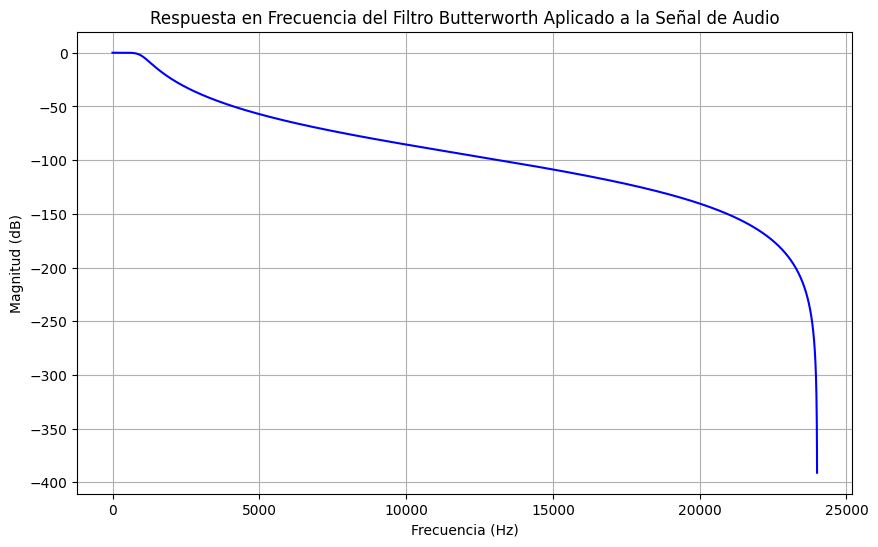

In [ ]:
import scipy.signal as signal

# Parámetros del filtro Butterworth
orden = 4  # Orden del filtro
frecuencia_corte = 1000  # Frecuencia de corte en Hz

# Se normaliza la frecuencia de corte
frecuencia_corte_normalizada = frecuencia_corte / (sr / 2)

# Se diseña el filtro Butterworth
b, a = signal.butter(orden, frecuencia_corte_normalizada, btype='low')

# Se aplica el filtro a la señal de audio
y_filtrada = signal.filtfilt(b, a, y)

# Se calcula la respuesta en frecuencia del filtro Butterworth aplicado
frecuencia, respuesta = signal.freqz(b, a, worN=8000)
magnitud = 20 * np.log10(abs(respuesta))

# Graficar la respuesta en frecuencia del filtro Butterworth aplicado a la señal de audio
plt.figure(figsize=(10, 6))
plt.plot(0.5 * sr * frecuencia / np.pi, magnitud, 'b')
plt.title('Respuesta en Frecuencia del Filtro Butterworth Aplicado a la Señal de Audio')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.show()



La frecuencia en la que la magnitud de la respuesta cae a -3 dB es la frecuencia de corte del filtro. En este caso, la frecuencia de corte es de 1000 Hz. Por otro lado,  el ancho de banda del filtro se puede observar en la región donde la magnitud de la respuesta disminuye significativamente desde su valor máximo. Cuanto más estrecha sea esta región, más selectivo será el filtro. Finalmente, la magnitud de la respuesta indica cuánto atenúa el filtro las diferentes frecuencias. Por lo que, cuanto más bajo sea el valor de magnitud, mayor será la atenuación del filtro en esa frecuencia.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
